In [30]:
import requests
from io import StringIO
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [31]:
url = "https://raw.githubusercontent.com/Atik1000/agriculture/master/Sensor%20data%20for%2030%20cm.csv"
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df=pd.read_csv(data)

In [32]:
df

,Date and Time,Humidity,WaterLevel,SoilMoisture
0,2022-06-15 16:00:35,20.99,7.81,197
1,2022-06-15 16:06:33,20.99,7.81,197
2,2022-06-15 16:02:33,20.98,7.81,197
3,2022-06-15 16:03:22,20.98,7.81,197
4,2022-06-15 16:04:26,20.98,7.81,197
...,...,...,...,...
9618,2022-06-22 16:21:06,21.32,7.49,212
9619,2022-06-22 16:22:09,21.32,7.49,212
9620,2022-06-22 16:23:16,21.34,7.49,212
9621,2022-06-22 16:24:23,21.34,7.50,212


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  9623 non-null   object 
 1   Humidity       9623 non-null   float64
 2   WaterLevel     9623 non-null   float64
 3   SoilMoisture   9623 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 300.8+ KB


In [34]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [35]:
df.SoilMoisture.describe()

count    9623.000000
mean      215.580796
std        16.108107
min       194.000000
25%       204.000000
50%       212.000000
75%       224.000000
max       249.000000
Name: SoilMoisture, dtype: float64

In [36]:
fig = px.histogram(df, 
                   x='SoilMoisture', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of SoilMoisture')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
df.WaterLevel.describe()



count    9623.000000
mean        7.757886
std         0.443601
min         6.980000
25%         7.380000
50%         7.740000
75%         8.230000
max         8.430000
Name: WaterLevel, dtype: float64

In [41]:
fig = px.histogram(df, 
                   x='Date and Time',
                   y='WaterLevel',
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Water-level	')
fig.update_layout(bargap=0.1)
fig.show()


In [26]:

px.histogram(df, x='WaterLevel', color='WaterLevel', title='WaterLevel')

In [27]:

px.histogram(df, x='SoilMoisture', color='SoilMoisture', title='SoilMoisture')

In [28]:
 df.corr()

,Temperature,WaterLevel,SoilMoisture
Temperature,1.000000,-0.127100,-0.063066
WaterLevel,-0.127100,1.000000,0.053878
SoilMoisture,-0.063066,0.053878,1.000000


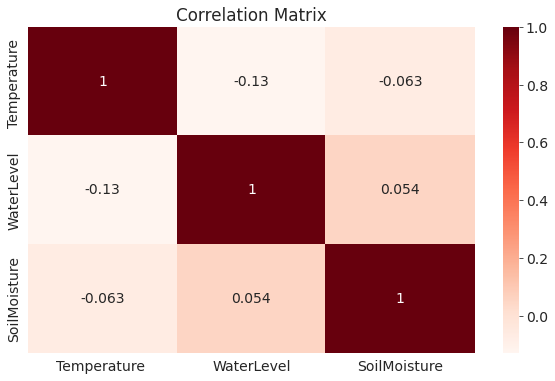

In [29]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

AttributeError: ignored